In [7]:
import pandas as pd

# Load the dataset
climate_data = pd.read_csv(r'C:\Users\HP\Downloads\Africa_climate_change.csv')

# Display the first few rows of the dataset
print(climate_data.head())

              DATE  PRCP  TAVG  TMAX  TMIN   COUNTRY
0  19800101 000000   NaN  54.0  61.0  43.0   Tunisia
1  19800101 000000   NaN  49.0  55.0  41.0   Tunisia
2  19800101 000000   0.0  72.0  86.0  59.0  Cameroon
3  19800101 000000   NaN  50.0  55.0  43.0   Tunisia
4  19800101 000000   NaN  75.0  91.0   NaN  Cameroon


In [11]:
climate_data.shape

(464815, 6)

In [9]:
# Check for missing values
print(climate_data.isnull().sum())

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64


In [13]:
# Drop rows with missing values (if any)
climate_data.dropna(inplace=True)

In [15]:
print(climate_data.isnull().sum())

DATE       0
PRCP       0
TAVG       0
TMAX       0
TMIN       0
COUNTRY    0
dtype: int64


In [17]:
climate_data.shape

(113737, 6)

In [19]:
climate_data.dtypes

DATE        object
PRCP       float64
TAVG       float64
TMAX       float64
TMIN       float64
COUNTRY     object
dtype: object

In [25]:
# Convert date column to datetime format (assuming there's a 'date' column)
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'])

# now let's confirm
climate_data['DATE'].dtype

dtype('<M8[ns]')

In [27]:
# Display the cleaned data
print(climate_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 113737 entries, 2 to 464809
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   DATE     113737 non-null  datetime64[ns]
 1   PRCP     113737 non-null  float64       
 2   TAVG     113737 non-null  float64       
 3   TMAX     113737 non-null  float64       
 4   TMIN     113737 non-null  float64       
 5   COUNTRY  113737 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 6.1+ MB
None


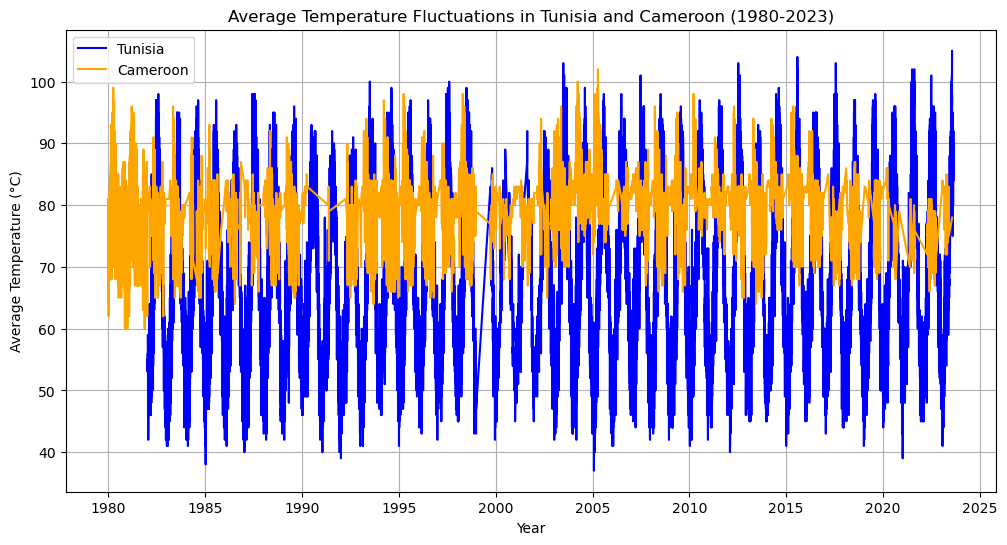

In [43]:
import matplotlib.pyplot as plt

# Filter data for Tunisia and Cameroon
tunisia_data = climate_data[climate_data['COUNTRY'] == 'Tunisia']
cameroon_data = climate_data[climate_data['COUNTRY'] == 'Cameroon']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tunisia_data['DATE'], tunisia_data['TAVG'], label='Tunisia', color='blue')
plt.plot(cameroon_data['DATE'], cameroon_data['TAVG'], label='Cameroon', color='orange')
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2023)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

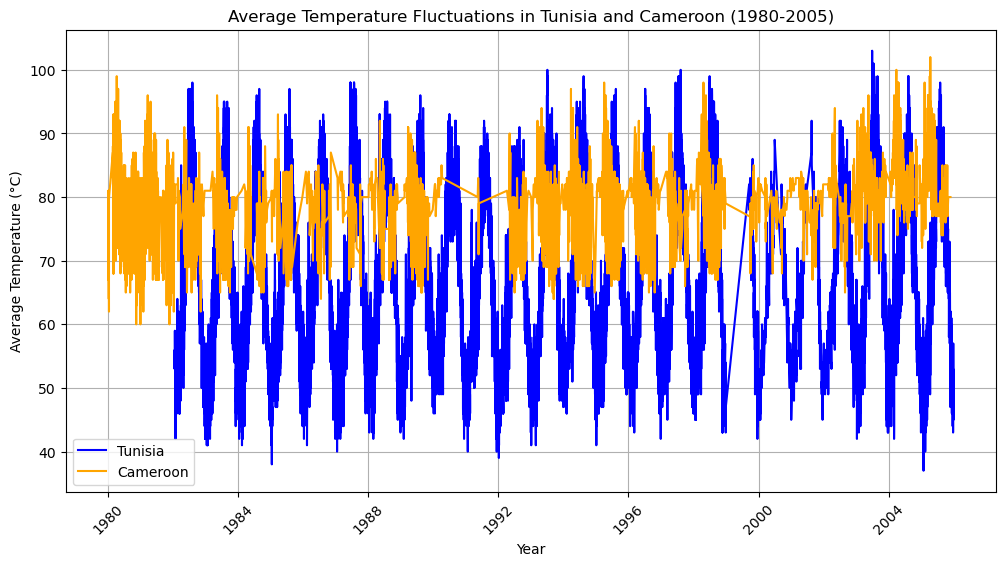

In [47]:
# Filter data between 1980 and 2005
filtered_data = climate_data[(climate_data['DATE'] >= '1980-01-01') & (climate_data['DATE'] <= '2005-12-31')]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(filtered_data[filtered_data['COUNTRY'] == 'Tunisia']['DATE'], 
         filtered_data[filtered_data['COUNTRY'] == 'Tunisia']['TAVG'], label='Tunisia', color='blue')
plt.plot(filtered_data[filtered_data['COUNTRY'] == 'Cameroon']['DATE'], 
         filtered_data[filtered_data['COUNTRY'] == 'Cameroon']['TAVG'], label='Cameroon', color='orange')
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

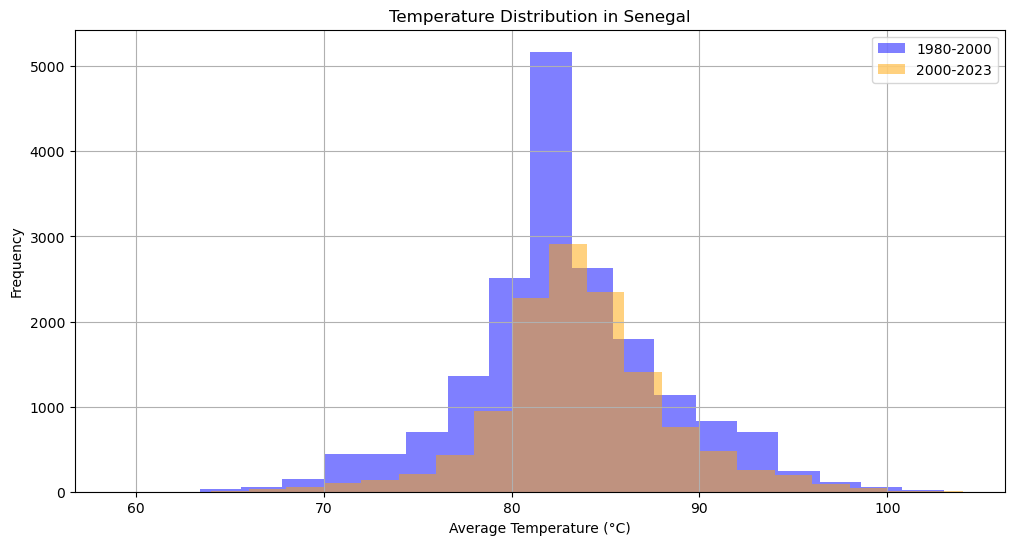

In [49]:
# Filter data for Senegal
senegal_data = climate_data[climate_data['COUNTRY'] == 'Senegal']

# Filter for the two time periods
senegal_1980_2000 = senegal_data[(senegal_data['DATE'] >= '1980-01-01') & (senegal_data['DATE'] <= '2000-12-31')]
senegal_2000_2023 = senegal_data[(senegal_data['DATE'] > '2000-12-31') & (senegal_data['DATE'] <= '2023-12-31')]

# Plotting histograms
plt.figure(figsize=(12, 6))
plt.hist(senegal_1980_2000['TAVG'], bins=20, alpha=0.5, label='1980-2000', color='blue')
plt.hist(senegal_2000_2023['TAVG'], bins=20, alpha=0.5, label='2000-2023', color='orange')
plt.title('Temperature Distribution in Senegal')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()